# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en estructuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

Instalación del paquete de yahoo finance

```sh
conda install -c conda-forge yfinance
```
Y pandas_datareader
```sh
conda install -c anaconda pandas-datareader
```

Con el siguiente comando se pueden instalar paqueten en anaconda directamente desde el notebook

In [8]:
!conda install -c anaconda pandas-datareader -y

Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.9.0               |   py39hecd8cb5_0         977 KB
    pandas-datareader-0.10.0   |     pyhd3eb1b0_0          71 KB  anaconda
    ------------------------------------------------------------
                                           Total:         1.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.7.2~ --> anaconda::ca-certificates-2022.4.26-hecd8cb5_0 
  certifi            conda-forge/noarch::certifi-2023.7.22~ --> anaconda/osx-64::certifi-2022.6.15-py39hecd8cb5_0 
  conda              conda-forge::conda-23.9.0-py39h6e9494~ --> pkgs/main::conda-23.9.0-py39hecd8cb5_0 
  openssl            conda-forge

In [36]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Primero importaremos datos desde un archivo con extensión `.csv`

In [37]:
#Importar datos de un archivo csv
datos_AAPL = pd.read_csv("AAPL.csv")
datos_AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-16,26.674999,27.557501,26.650000,27.497499,25.882893,235362000
1,2016-11-17,27.452499,27.587500,27.207500,27.487499,25.873484,110528000
2,2016-11-18,27.430000,27.635000,27.415001,27.514999,25.899368,113715600
3,2016-11-21,27.530001,27.997499,27.502501,27.932501,26.292355,117058400
4,2016-11-22,27.987499,28.105000,27.850000,27.950001,26.308825,103862000
...,...,...,...,...,...,...,...
1253,2021-11-09,150.199997,151.429993,150.059998,150.809998,150.809998,56787900
1254,2021-11-10,150.020004,150.130005,147.850006,147.919998,147.919998,65187100
1255,2021-11-11,148.960007,149.429993,147.679993,147.869995,147.869995,41000000
1256,2021-11-12,148.429993,150.399994,147.479996,149.990005,149.990005,63632600


In [38]:
datos_AAPL[['Volume', 'Close']]

,Volume,Close
0,235362000,27.497499
1,110528000,27.487499
2,113715600,27.514999
3,117058400,27.932501
4,103862000,27.950001
...,...,...
1253,56787900,150.809998
1254,65187100,147.919998
1255,41000000,147.869995
1256,63632600,149.990005


In [55]:
#Obtener columnas específicas del dataframe(tabla)

cols_interes = ['Date', 'Adj Close', 'Volume']

datos_filtrados = datos_AAPL[cols_interes]
datos_filtrados

,Date,Adj Close,Volume
0,2016-11-16,25.882893,235362000
1,2016-11-17,25.873484,110528000
2,2016-11-18,25.899368,113715600
3,2016-11-21,26.292355,117058400
4,2016-11-22,26.308825,103862000
...,...,...,...
1253,2021-11-09,150.809998,56787900
1254,2021-11-10,147.919998,65187100
1255,2021-11-11,147.869995,41000000
1256,2021-11-12,149.990005,63632600


In [56]:
datos_filtrados['Date'] = pd.to_datetime(datos_filtrados['Date'])
datos_filtrados.set_index('Date', inplace=True)

datos_filtrados.head()

/var/folders/f_/yfk7pckx1pvcrgw8dsns53yr0000gn/T/ipykernel_63697/23445583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados['Date'] = pd.to_datetime(datos_filtrados['Date'])


,Adj Close,Volume
Date,,
2016-11-16,25.882893,235362000
2016-11-17,25.873484,110528000
2016-11-18,25.899368,113715600
2016-11-21,26.292355,117058400
2016-11-22,26.308825,103862000


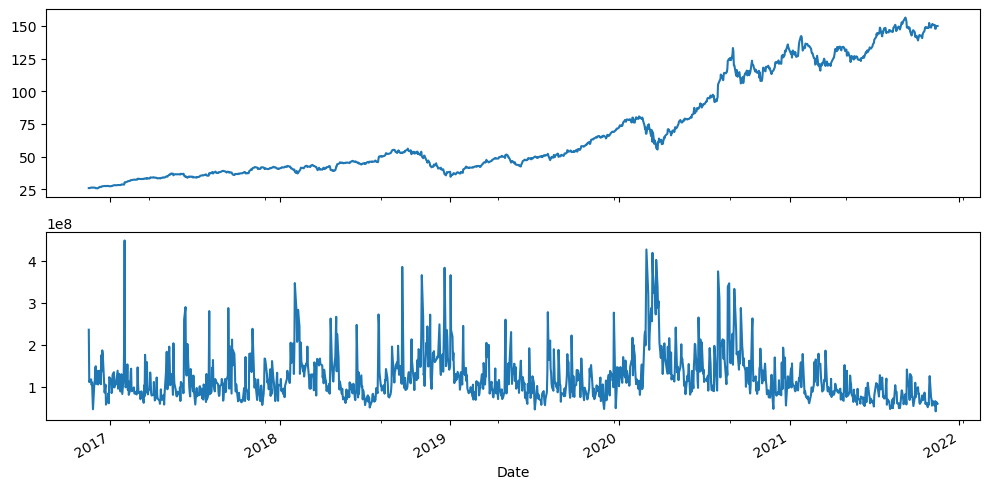

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
datos_filtrados['Adj Close'].plot(ax=ax[0])

datos_filtrados['Volume'].plot(ax=ax[1])
plt.tight_layout()
plt.show()

In [40]:
# Obtener el nombre de las columnas del dataframe
datos_AAPL.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Tenemos que instalar pandas_datareader primero. Para ejecutamos en la terminal el siguiente comando:
> https://anaconda.org/anaconda/pandas-datareader

Ahora lo haremos desde Yahoo Finance

In [10]:
# Importar el modulo data del paquete pandas_datareader. 
# La comunidad lo importa con el nombre de web
import pandas_datareader.data as web
import yfinance as yf

In [11]:
# Sobre escribir el método de lectura de pandas-datareader por el de yahoo-finance
yf.pdr_override()

In [67]:
# download dataframe
ticker = ['AAPL', 'MSFT']
data = web.get_data_yahoo(ticker, start="2017-01-01", end="2017-04-30")
data

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
                 AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2017-01-03  27.059305  57.254704  29.037500  62.580002  29.082500  62.840000   
2017-01-04  27.029022  56.998524  29.004999  62.299999  29.127501  62.750000   
2017-01-05  27.166471  56.998524  29.152500  62.299999  29.215000  62.660000   
2017-01-06  27.469336  57.492577  29.477501  62.840000  29.540001  63.150002   
2017-01-09  27.720936  57.309582  29.747499  62.639999  29.857500  63.080002   
...               ...        ...        ...        ...        ...        ...   
2017-04-24  33.608688  62.158024  35.910000  67.529999  35.987499  67.660004   
2017-04-25  33.816944  62.517021  36.132500  67.919998  36.224998  68.040001   
2017-04-26  33.618053  62.434177  35.919998  67.830002  36.150002  68.309998   
2017-04-27  33.643803  62.839180  35.947498  68.269997  36.040001  68.379997   
2017-04-28  33.611046  63.014072  35.912498  68.459999  36.075001  69.139999   

                  Low                  Open                Volume            
                 AAPL       MSFT       AAPL       MSFT       AAPL      MSFT  
Date                                                                         
2017-01-03  28.690001  62.130001  28.950001  62.790001  115127600  20694100  
2017-01-04  28.937500  62.119999  28.962500  62.480000   84472400  21340000  
2017-01-05  28.952499  62.029999  28.980000  62.189999   88774400  24876000  
2017-01-06  29.117500  62.040001  29.195000  62.299999  127007600  19922900  
2017-01-09  29.485001  62.540001  29.487499  62.759998  134247600  20382700  
...               ...        ...        ...        ...        ...       ...  
2017-04-24  35.794998  67.099998  35.875000  67.480003   68537200  29770000  
2017-04-25  35.967499  67.599998  35.977501  67.900002   75486000  30242700  
2017-04-26  35.845001  67.620003  36.117500  68.080002   80164800  26190800  
2017-04-27  35.827499  67.580002  35.980000  68.150002   56985200  34971000  
2017-04-28  35.817501  67.690002  36.022499  68.910004   83441600  39548800  

[81 rows x 12 columns]

In [70]:
data[['Adj Close']]

Adj Close           
                 AAPL       MSFT
Date                            
2017-01-03  27.059305  57.254704
2017-01-04  27.029022  56.998524
2017-01-05  27.166471  56.998524
2017-01-06  27.469336  57.492577
2017-01-09  27.720936  57.309582
...               ...        ...
2017-04-24  33.608688  62.158024
2017-04-25  33.816944  62.517021
2017-04-26  33.618053  62.434177
2017-04-27  33.643803  62.839180
2017-04-28  33.611046  63.014072

[81 rows x 2 columns]

In [81]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    
    if len(tickers) == 1:
        closes = closes.to_frame().copy()
        closes.columns = [tickers]
    return closes

In [87]:
a = get_adj_closes(ticker)
a

[*********************100%***********************]  2 of 2 completed


,AAPL,MSFT
Date,,
1980-12-12,0.099450,NaN
1980-12-15,0.094261,NaN
1980-12-16,0.087343,NaN
1980-12-17,0.089504,NaN
1980-12-18,0.092099,NaN
...,...,...
2023-09-26,171.960007,312.140015
2023-09-27,170.429993,312.790009
2023-09-28,170.690002,313.640015


In [90]:
# Instrumentos a descargar 
names = ['AMZN', 'SPOT', 'CEMEXCPO.MX', 'CUERVO.MX']

# Fechas: inicios 2017 a finales de 2020
start = '2017-01-01'
end = '2020-12-31'

In [91]:
# Obtenemos los precios ajustados en el cierre
data = get_adj_closes(names, start, end)
data

[*********************100%***********************]  4 of 4 completed


,AMZN,CEMEXCPO.MX,CUERVO.MX,SPOT
Date,,,,
2017-01-02,NaN,15.502295,NaN,NaN
2017-01-03,37.683498,15.502295,NaN,NaN
2017-01-04,37.859001,15.933435,NaN,NaN
2017-01-05,39.022499,15.952180,NaN,NaN
2017-01-06,39.799500,15.952180,NaN,NaN
...,...,...,...,...
2020-12-23,159.263504,10.370000,48.699604,330.790009
2020-12-24,158.634506,10.250000,48.602478,328.390015
2020-12-28,164.197998,10.320000,48.884148,317.290009


¿Cómo lucen estos datos?

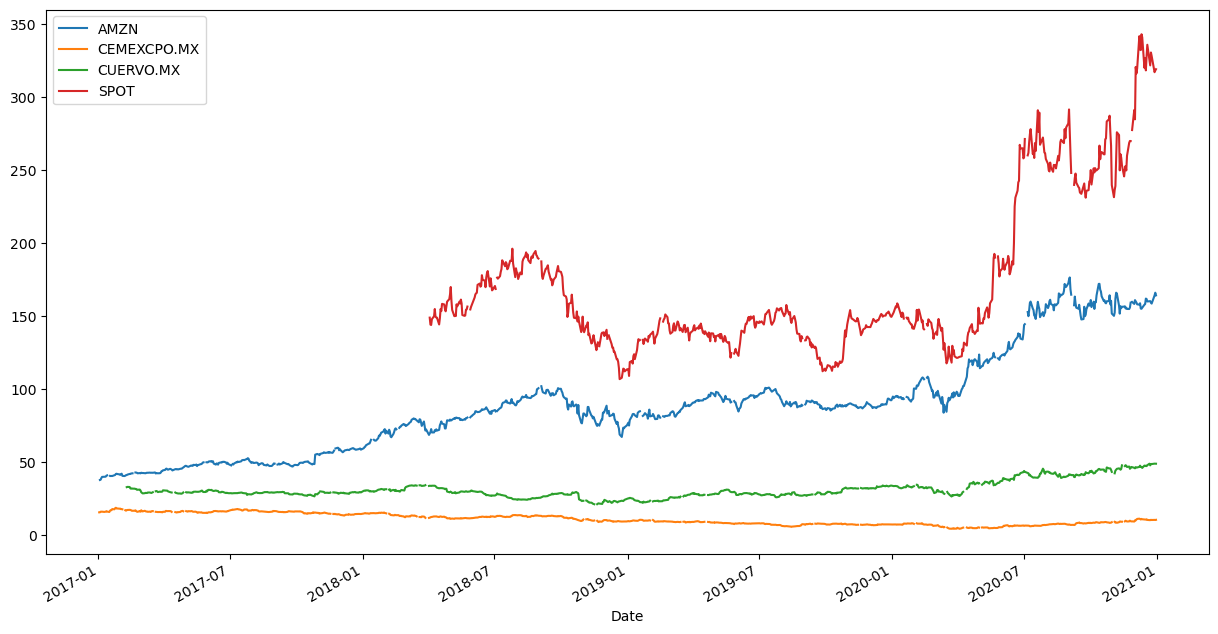

In [92]:
# Graficar
data.plot(figsize=(15,8))
plt.show()

<Axes: xlabel='Date'>

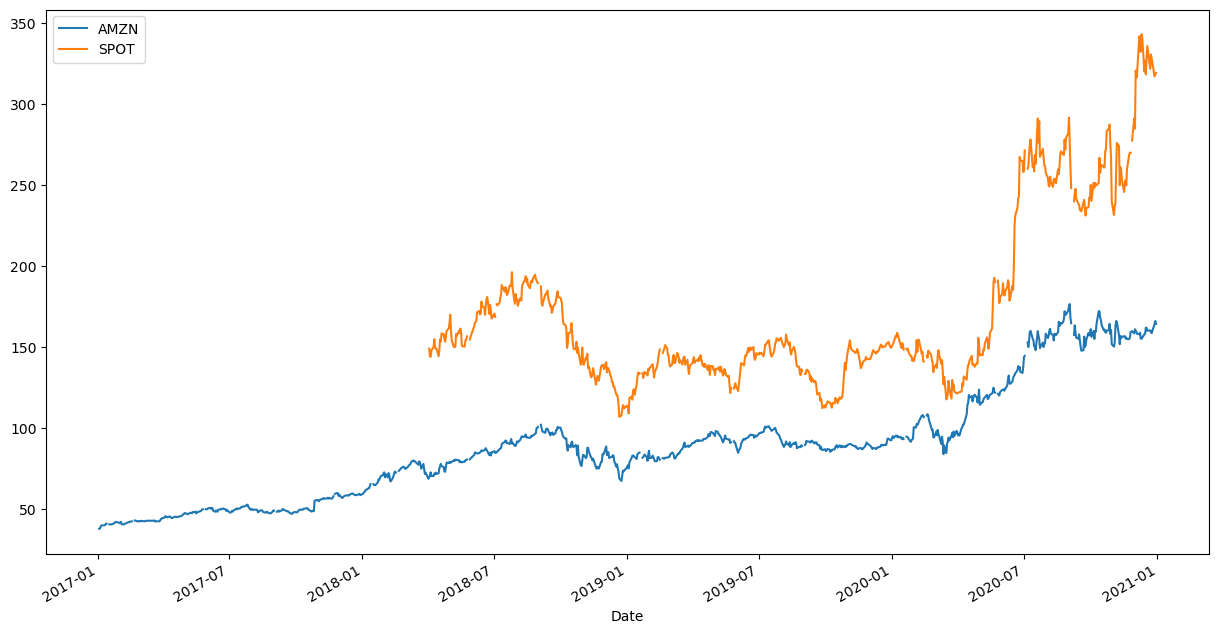

In [93]:
data_US = data[['AMZN', 'SPOT']]
data_MX = data[['CEMEXCPO.MX', 'CUERVO.MX']]

data_US.plot(figsize=(15,8))

<Axes: xlabel='Date'>

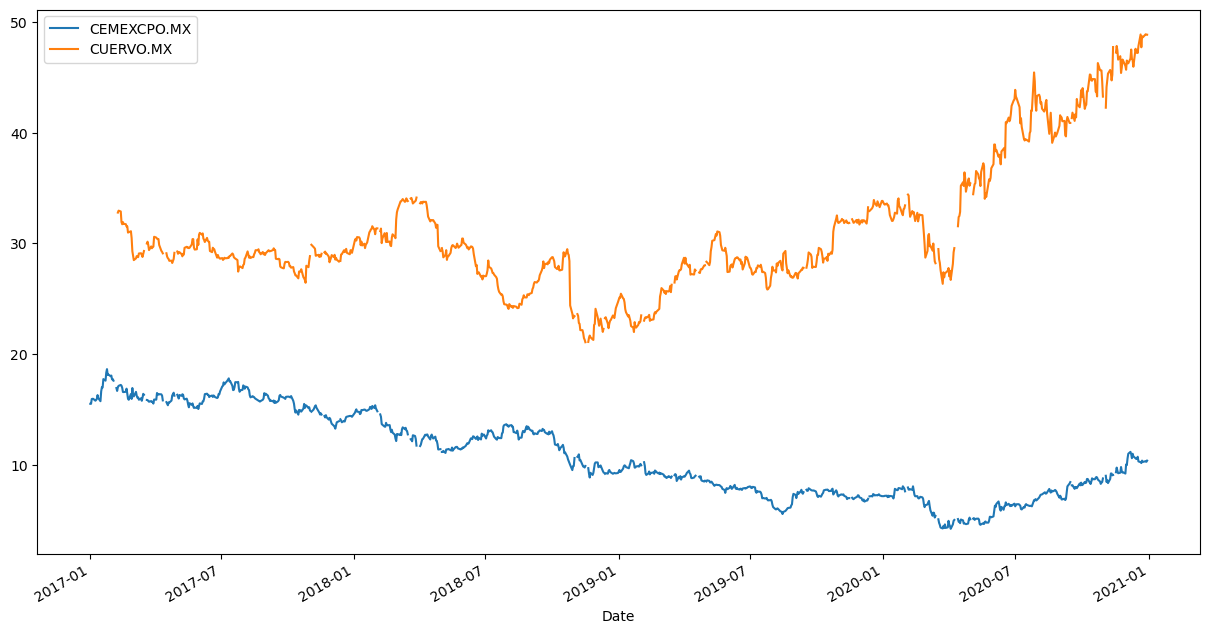

In [94]:
data_MX.plot(figsize=(15,8))

array([[<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'CEMEXCPO.MX'}>],
       [<Axes: title={'center': 'CUERVO.MX'}>,
        <Axes: title={'center': 'SPOT'}>]], dtype=object)

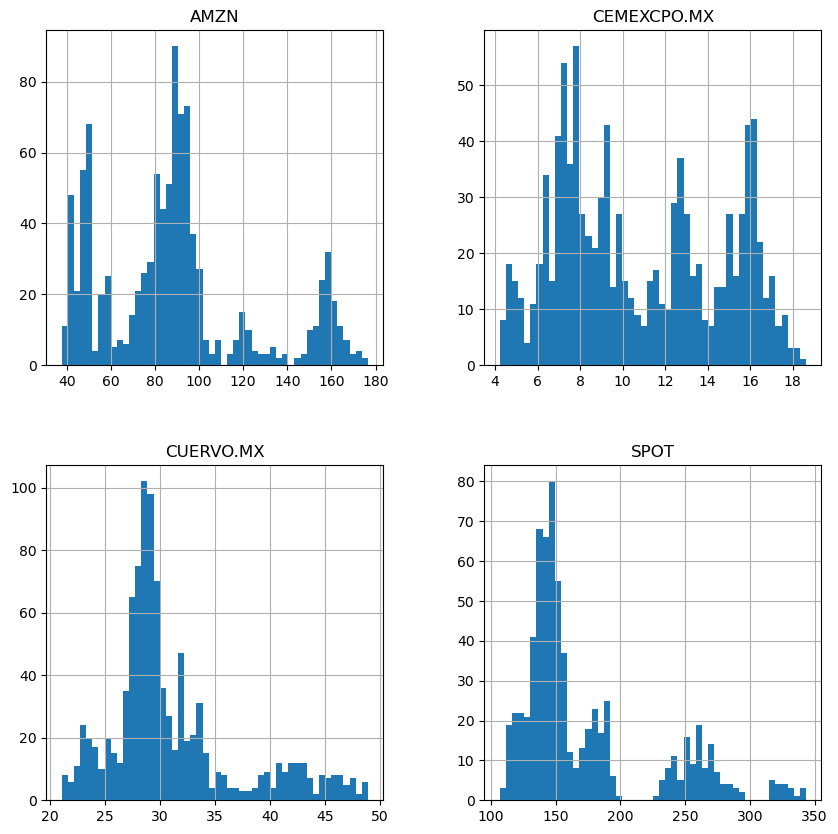

In [95]:
data.hist(bins=50, figsize=(10,10))

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [96]:
# Método describe
data.describe()

,AMZN,CEMEXCPO.MX,CUERVO.MX,SPOT
count,1006.000000,1004.000000,977.000000,693.000000
mean,88.516813,10.813998,31.024159,171.894762
std,33.955523,3.782924,5.923561,52.499796
min,37.683498,4.210000,21.065416,106.839996
25%,59.896125,7.569137,27.748522,138.600006
50%,87.478252,9.918094,29.249748,149.679993
75%,96.942873,14.406825,32.681377,185.949997
max,176.572495,18.632746,48.884148,343.299988


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1032 entries, 2017-01-02 to 2020-12-30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AMZN         1006 non-null   float64
 1   CEMEXCPO.MX  1004 non-null   float64
 2   CUERVO.MX    977 non-null    float64
 3   SPOT         693 non-null    float64
dtypes: float64(4)
memory usage: 40.3 KB


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}=\frac{S_t}{S_{t-1}}- 1
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [98]:
data.head(4)

,AMZN,CEMEXCPO.MX,CUERVO.MX,SPOT
Date,,,,
2017-01-02,NaN,15.502295,NaN,NaN
2017-01-03,37.683498,15.502295,NaN,NaN
2017-01-04,37.859001,15.933435,NaN,NaN
2017-01-05,39.022499,15.952180,NaN,NaN


In [102]:
# Método shift
data.shift().head(4)

,AMZN,CEMEXCPO.MX,CUERVO.MX,SPOT
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,15.502295,NaN,NaN
2017-01-04,37.683498,15.502295,NaN,NaN
2017-01-05,37.859001,15.933435,NaN,NaN


In [107]:
(data - data.shift()) / data.shift()

,AMZN,CEMEXCPO.MX,CUERVO.MX,SPOT
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.000000,NaN,NaN
2017-01-04,0.004657,0.027811,NaN,NaN
2017-01-05,0.030732,0.001176,NaN,NaN
2017-01-06,0.019912,0.000000,NaN,NaN
...,...,...,...,...
2020-12-23,-0.006627,0.021675,0.020766,0.027426
2020-12-24,-0.003949,-0.011572,-0.001994,-0.007255
2020-12-28,0.035071,0.006829,0.005795,-0.033801


In [104]:
0.175503 / 37.683498

0.004657290573184049

<Axes: xlabel='Date'>

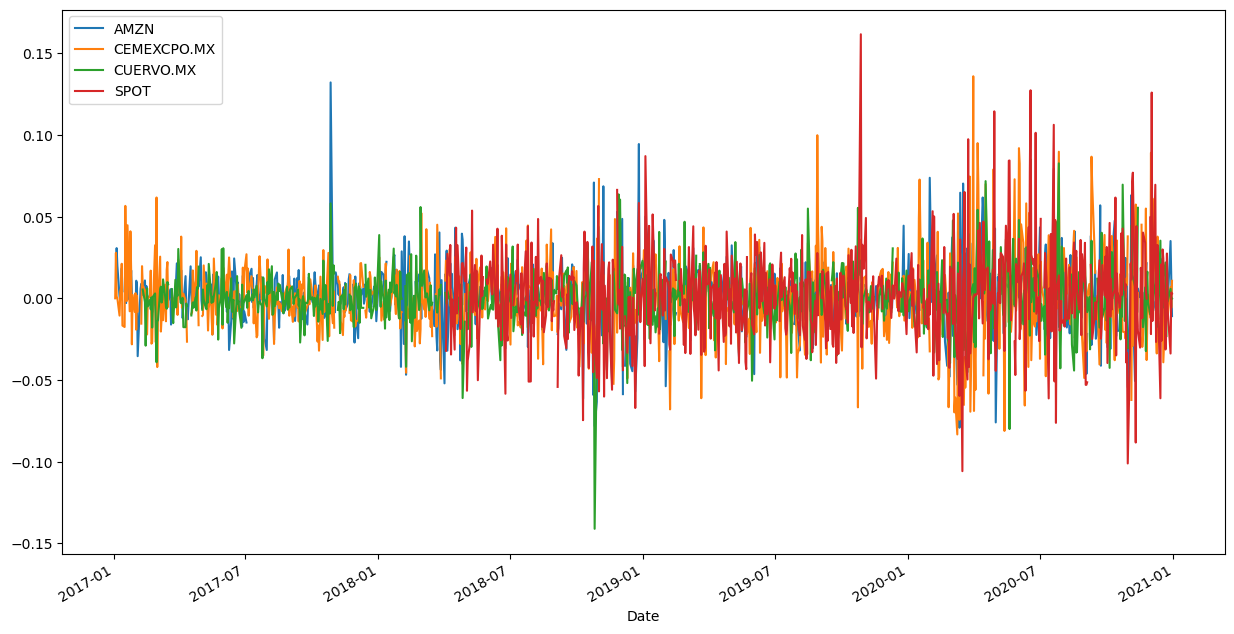

In [108]:
# Entonces los rendimientos se calculan como
data_ret = (data - data.shift())/data.shift()

data_ret.plot(figsize=(15, 8))

In [109]:
# Método pct_change (Este método es exactamente igual a la ecuación de la celda anterior)
data_ret_2 = data.pct_change()
data_ret_2

,AMZN,CEMEXCPO.MX,CUERVO.MX,SPOT
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.000000,NaN,NaN
2017-01-04,0.004657,0.027811,NaN,NaN
2017-01-05,0.030732,0.001176,NaN,NaN
2017-01-06,0.019912,0.000000,NaN,NaN
...,...,...,...,...
2020-12-23,-0.006627,0.021675,0.020766,0.027426
2020-12-24,-0.003949,-0.011572,-0.001994,-0.007255
2020-12-28,0.035071,0.006829,0.005795,-0.033801


y la gráfica de los rendimientos se puede obtener como...

<Axes: xlabel='Date'>

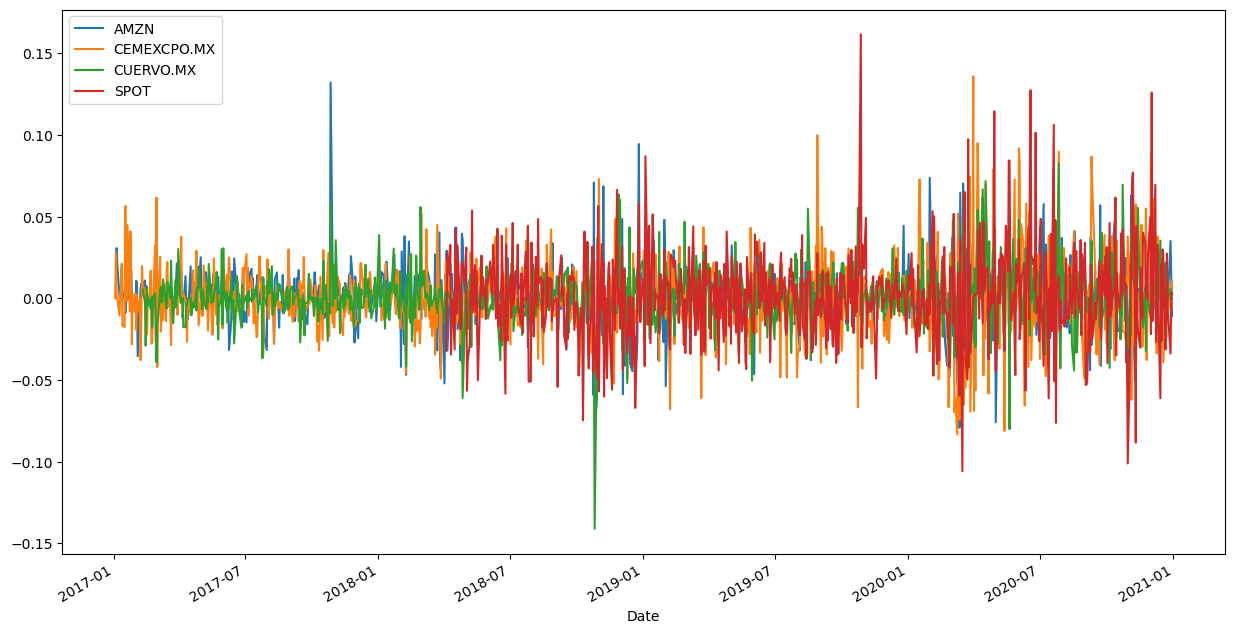

In [110]:
# Gráfica
data_ret_2.plot(figsize=(15, 8))

In [112]:
data_ret_2.describe()
data_ret_2.mean()

AMZN           0.001611
CEMEXCPO.MX   -0.000117
CUERVO.MX      0.000540
SPOT           0.001471
dtype: float64

array([[<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'CEMEXCPO.MX'}>],
       [<Axes: title={'center': 'CUERVO.MX'}>,
        <Axes: title={'center': 'SPOT'}>]], dtype=object)

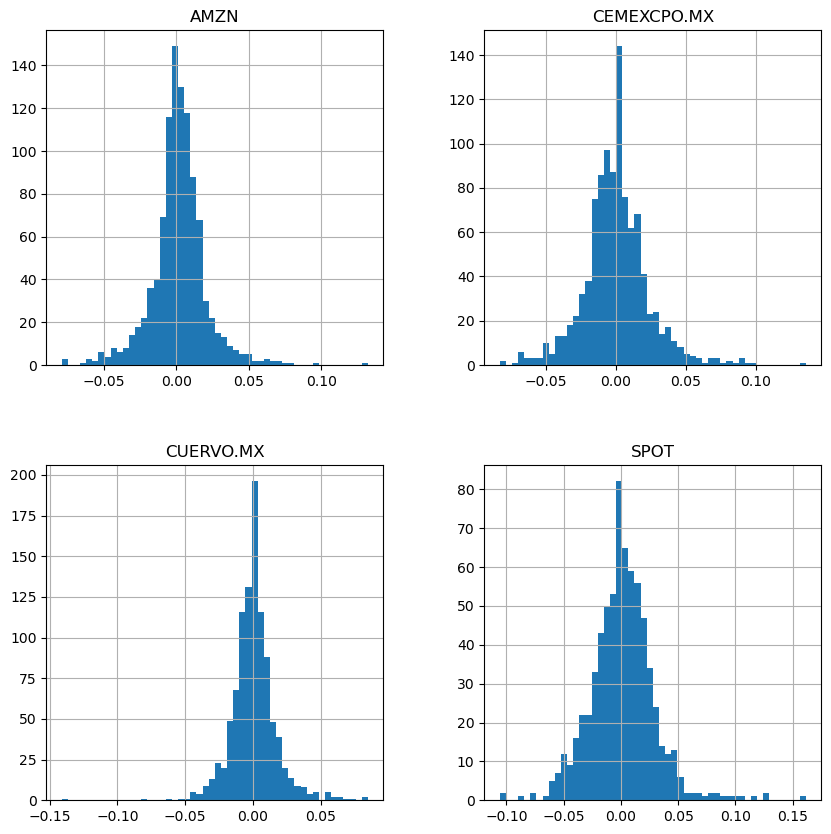

In [113]:
data_ret_2.hist(bins=50, figsize=(10,10))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

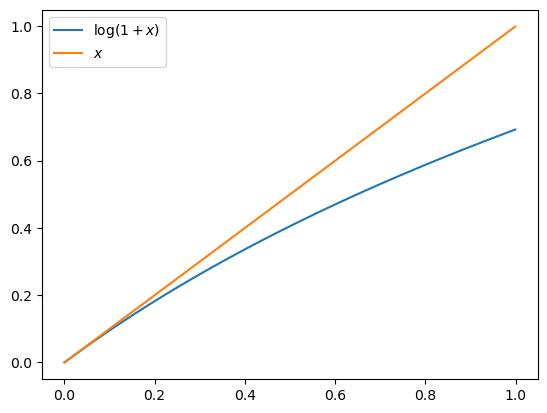

In [114]:
x = np.arange(0, 1, 0.001)
y1 = np.log(x + 1)
y2 = x

plt.plot(x, y1, label='$\log(1+x)$')
plt.plot(x, y2, label='$x$')
plt.legend()
plt.show()

In [115]:
# Rendimiento logarítmico
data_ret_log = np.log(data/data.shift())
data_ret_log

,AMZN,CEMEXCPO.MX,CUERVO.MX,SPOT
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.000000,NaN,NaN
2017-01-04,0.004646,0.027432,NaN,NaN
2017-01-05,0.030270,0.001176,NaN,NaN
2017-01-06,0.019716,0.000000,NaN,NaN
...,...,...,...,...
2020-12-23,-0.006649,0.021443,0.020553,0.027056
2020-12-24,-0.003957,-0.011639,-0.001996,-0.007282
2020-12-28,0.034470,0.006806,0.005779,-0.034386


<Axes: xlabel='Date'>

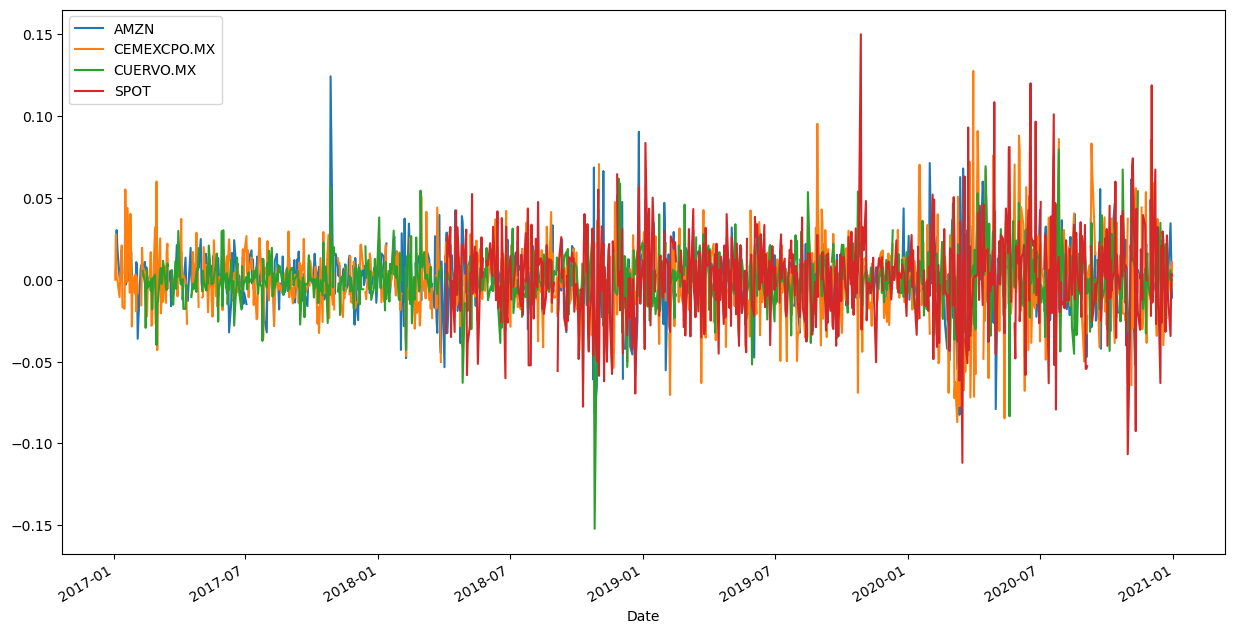

In [116]:
# Gráfica
data_ret_log.plot(figsize=(15,8))

<Axes: xlabel='Date'>

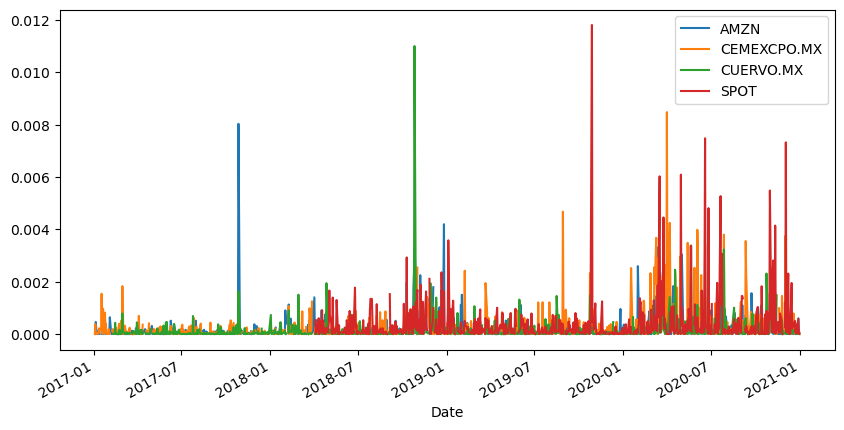

In [117]:
# Valor absoluto de la diferencia
np.abs(data_ret_log - data_ret_2).plot(figsize=(10,5))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los rendimientos son normales...

In [42]:
# Media (promedio) y volatilidad de rendimientos
data.mean() # Promedio de los precios

Symbols
AMZN            88.590626
SPOT           172.100476
CEMEXCPO.MX     10.813457
CUERVO.MX       31.394328
dtype: float64

In [43]:
data_ret_log.mean() # Promedio de los rendimientos logarítmicos

Symbols
AMZN           0.001401
SPOT           0.001139
CEMEXCPO.MX   -0.000362
CUERVO.MX      0.000211
dtype: float64

In [44]:
# Desviación estándar (volatilidad)
data.std()   # Desviación estándar de los precios

Symbols
AMZN           34.019376
SPOT           52.741067
CEMEXCPO.MX     3.781079
CUERVO.MX       6.014349
dtype: float64

In [45]:
data_ret_log.std()  # Volatilidad de los rendimientos logarítmicos

Symbols
AMZN           0.019223
SPOT           0.028548
CEMEXCPO.MX    0.023637
CUERVO.MX      0.016954
dtype: float64

In [62]:
ret_desv = data_ret_log.std()
ret_desv[['AMZN', 'SPOT']]

Symbols
AMZN    0.019223
SPOT    0.028548
dtype: float64

<AxesSubplot:xlabel='Date'>

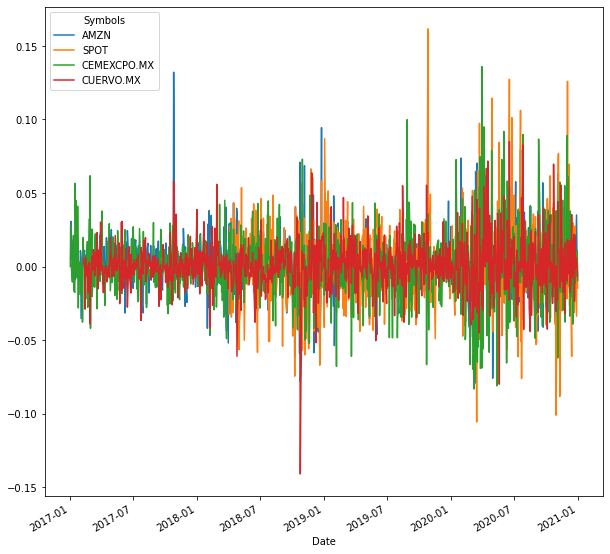

In [46]:
data_ret_2.plot(figsize=(10,10))

<Axes: xlabel='Date'>

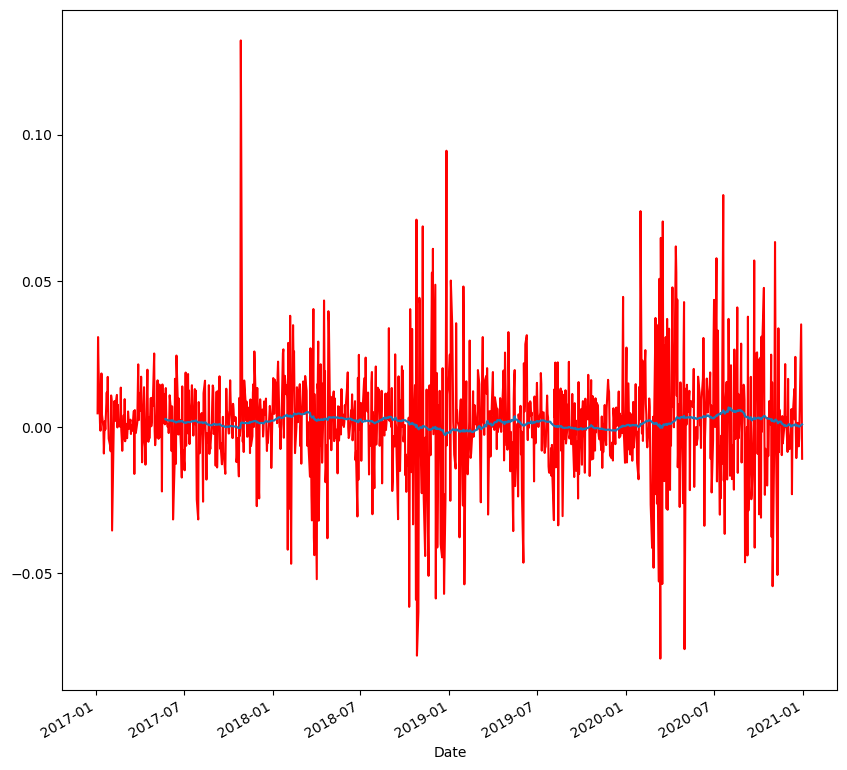

In [118]:
data_ret_2['AMZN'].plot(figsize=(10,10), color='r')
data_ret_2['AMZN'].rolling(100).mean().plot(figsize=(10,10))

<Axes: xlabel='Date'>

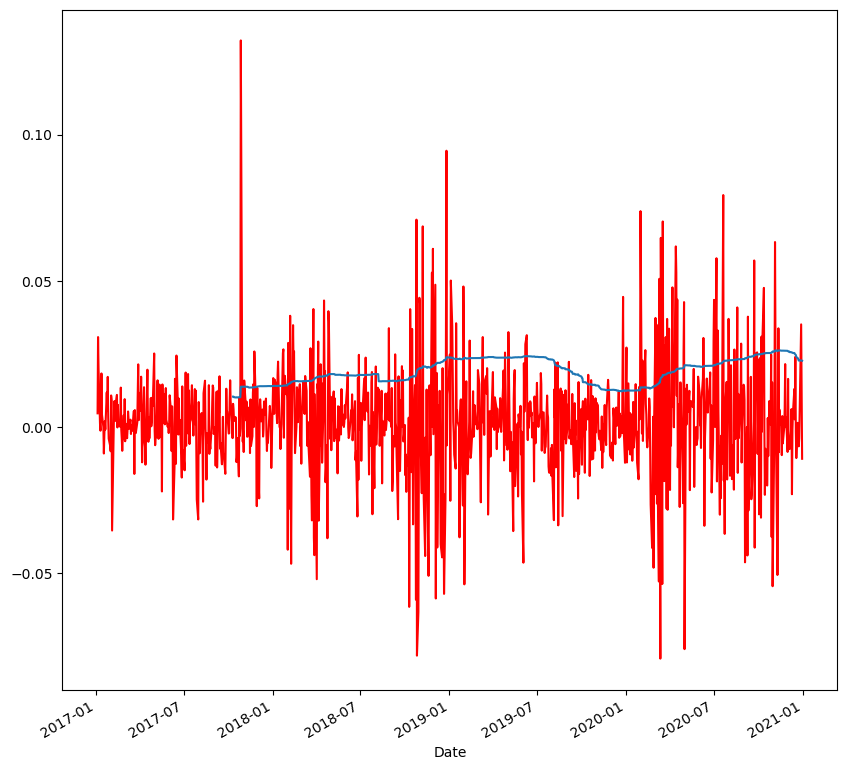

In [119]:
data_ret_2['AMZN'].plot(figsize=(10,10), color='r')
data_ret_2['AMZN'].rolling(200).std().plot(figsize=(10,10))

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario en media normal (gaussiana).

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>